In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/playground-series-s4e7/sample_submission.csv
/kaggle/input/playground-series-s4e7/train.csv
/kaggle/input/playground-series-s4e7/test.csv


In [2]:
train = pd.read_csv('/kaggle/input/playground-series-s4e7/train.csv')
test = pd.read_csv('/kaggle/input/playground-series-s4e7/test.csv')

In [3]:
train

,id,Gender,Age,Driving_License,Region_Code,Previously_Insured,Vehicle_Age,Vehicle_Damage,Annual_Premium,Policy_Sales_Channel,Vintage,Response
0,0,Male,21,1,35.0,0,1-2 Year,Yes,65101.0,124.0,187,0
1,1,Male,43,1,28.0,0,> 2 Years,Yes,58911.0,26.0,288,1
2,2,Female,25,1,14.0,1,< 1 Year,No,38043.0,152.0,254,0
3,3,Female,35,1,1.0,0,1-2 Year,Yes,2630.0,156.0,76,0
4,4,Female,36,1,15.0,1,1-2 Year,No,31951.0,152.0,294,0
...,...,...,...,...,...,...,...,...,...,...,...,...
11504793,11504793,Male,48,1,6.0,0,1-2 Year,Yes,27412.0,26.0,218,0
11504794,11504794,Female,26,1,36.0,0,< 1 Year,Yes,29509.0,152.0,115,1
11504795,11504795,Female,29,1,32.0,1,< 1 Year,No,2630.0,152.0,189,0
11504796,11504796,Female,51,1,28.0,0,1-2 Year,Yes,48443.0,26.0,274,1


In [4]:
train.Response.value_counts()

Response
0    10089739
1     1415059
Name: count, dtype: int64

In [5]:
# Import required libraries
import pandas as pd

# Number of samples in the minority class
min_class_count = train['Response'].value_counts().min()

# Separate the data into two DataFrames based on the class
df_class_0 = train[train['Response'] == 0]
df_class_1 = train[train['Response'] == 1]

# Randomly sample from the majority class to match the minority class
df_class_0_sampled = df_class_0.sample(n=min_class_count, random_state=42)
df_class_1_sampled = df_class_1.sample(n=min_class_count, random_state=42)

# Combine the sampled data into a new balanced DataFrame
train = pd.concat([df_class_0_sampled, df_class_1_sampled])

# Shuffle the rows of the balanced DataFrame
train = train.sample(frac=1, random_state=42).reset_index(drop=True)

# Verify the new class distribution
print(train['Response'].value_counts())


Response
1    1415059
0    1415059
Name: count, dtype: int64


In [6]:
train

,id,Gender,Age,Driving_License,Region_Code,Previously_Insured,Vehicle_Age,Vehicle_Damage,Annual_Premium,Policy_Sales_Channel,Vintage,Response
0,789587,Female,38,1,11.0,0,1-2 Year,Yes,23750.0,26.0,191,1
1,6654021,Male,60,1,33.0,1,1-2 Year,No,2630.0,152.0,275,0
2,4983478,Female,46,1,28.0,0,1-2 Year,Yes,46509.0,156.0,249,0
3,3300373,Female,24,1,41.0,1,< 1 Year,No,28292.0,152.0,191,0
4,11310953,Female,38,1,20.0,0,1-2 Year,Yes,2630.0,26.0,272,0
...,...,...,...,...,...,...,...,...,...,...,...,...
2830113,7512370,Male,49,1,28.0,0,1-2 Year,Yes,45425.0,26.0,275,1
2830114,8833107,Male,43,1,41.0,0,1-2 Year,Yes,28609.0,26.0,34,1
2830115,6184032,Male,41,1,8.0,0,1-2 Year,Yes,35426.0,152.0,202,1
2830116,2391532,Male,35,1,28.0,0,1-2 Year,Yes,29192.0,125.0,69,1


# EDA

In [7]:
print(train.dtypes)

id                        int64
Gender                   object
Age                       int64
Driving_License           int64
Region_Code             float64
Previously_Insured        int64
Vehicle_Age              object
Vehicle_Damage           object
Annual_Premium          float64
Policy_Sales_Channel    float64
Vintage                   int64
Response                  int64
dtype: object


In [8]:
train = train.drop(columns=['id'])

In [9]:
train['Gender']= train['Gender'].map({'Male':1,'Female':0})

In [10]:
train['Region_Code']=train['Region_Code'].astype(int)
train['Annual_Premium']=train['Annual_Premium'].astype(int)
train['Policy_Sales_Channel']=train['Policy_Sales_Channel'].astype(int)

In [11]:
train['Vehicle_Damage']= train['Vehicle_Damage'].map({'Yes':1,'No':0})


In [12]:
train['Vehicle_Damage'] = train['Vehicle_Damage'].astype(int)

In [13]:
train

,Gender,Age,Driving_License,Region_Code,Previously_Insured,Vehicle_Age,Vehicle_Damage,Annual_Premium,Policy_Sales_Channel,Vintage,Response
0,0,38,1,11,0,1-2 Year,1,23750,26,191,1
1,1,60,1,33,1,1-2 Year,0,2630,152,275,0
2,0,46,1,28,0,1-2 Year,1,46509,156,249,0
3,0,24,1,41,1,< 1 Year,0,28292,152,191,0
4,0,38,1,20,0,1-2 Year,1,2630,26,272,0
...,...,...,...,...,...,...,...,...,...,...,...
2830113,1,49,1,28,0,1-2 Year,1,45425,26,275,1
2830114,1,43,1,41,0,1-2 Year,1,28609,26,34,1
2830115,1,41,1,8,0,1-2 Year,1,35426,152,202,1
2830116,1,35,1,28,0,1-2 Year,1,29192,125,69,1


In [14]:
train['Vehicle_Age'].unique()

array(['1-2 Year', '< 1 Year', '> 2 Years'], dtype=object)

In [15]:
train['Vehicle_Age'] = train['Vehicle_Age'].map({'1-2 Year':1,'> 2 Years':2,'< 1 Year':0})

In [16]:
train.isnull().sum()

Gender                  0
Age                     0
Driving_License         0
Region_Code             0
Previously_Insured      0
Vehicle_Age             0
Vehicle_Damage          0
Annual_Premium          0
Policy_Sales_Channel    0
Vintage                 0
Response                0
dtype: int64

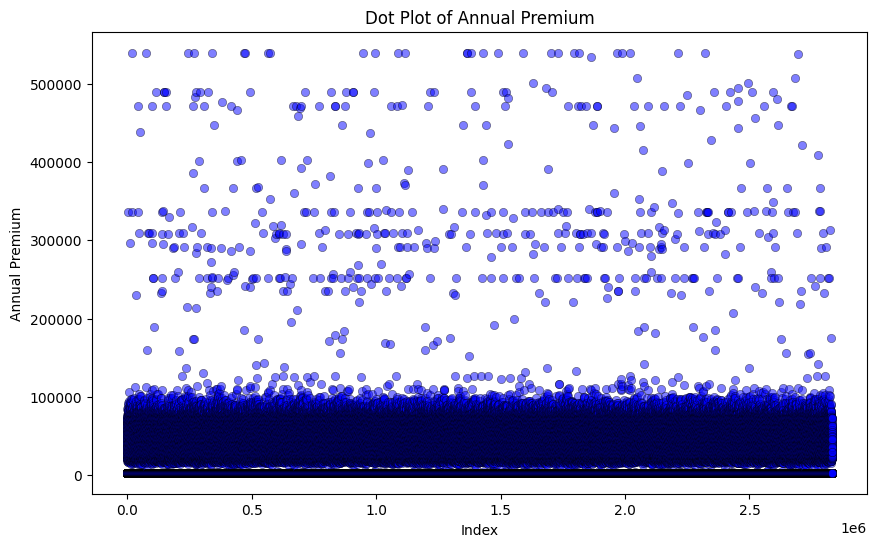

In [17]:
import seaborn as sns
import matplotlib.pyplot as plt

# Create a dot plot
plt.figure(figsize=(10, 6))
sns.scatterplot(x=train.index, y=train['Annual_Premium'], color='blue', edgecolor='k', alpha=0.5)
plt.title('Dot Plot of Annual Premium')
plt.xlabel('Index')
plt.ylabel('Annual Premium')
plt.show()


In [18]:
y_train = train['Response']
x_train = train.drop(columns =['Response'])


In [19]:
from sklearn.model_selection import train_test_split
x_train, x_val, y_train, y_val = train_test_split(x_train, y_train, test_size=0.2, random_state=42)

# For Test

In [20]:
test['Gender']= test['Gender'].map({'Male':1,'Female':0})

In [21]:
test['Region_Code']=test['Region_Code'].astype(int)
test['Annual_Premium']=test['Annual_Premium'].astype(int)
test['Policy_Sales_Channel']=test['Policy_Sales_Channel'].astype(int)

In [22]:
test['Vehicle_Damage']= test['Vehicle_Damage'].map({'Yes':1,'No':0})


In [23]:
test

,id,Gender,Age,Driving_License,Region_Code,Previously_Insured,Vehicle_Age,Vehicle_Damage,Annual_Premium,Policy_Sales_Channel,Vintage
0,11504798,0,20,1,47,0,< 1 Year,0,2630,160,228
1,11504799,1,47,1,28,0,1-2 Year,1,37483,124,123
2,11504800,1,47,1,43,0,1-2 Year,1,2630,26,271
3,11504801,0,22,1,47,1,< 1 Year,0,24502,152,115
4,11504802,1,51,1,19,0,1-2 Year,0,34115,124,148
...,...,...,...,...,...,...,...,...,...,...,...
7669861,19174659,1,57,1,28,0,1-2 Year,1,51661,124,109
7669862,19174660,1,28,1,50,1,< 1 Year,0,25651,152,184
7669863,19174661,1,47,1,33,1,1-2 Year,0,2630,138,63
7669864,19174662,1,30,1,28,0,< 1 Year,1,38866,124,119


In [24]:
test['Vehicle_Damage'] = test['Vehicle_Damage'].astype(int)

In [25]:
test['Vehicle_Age'] = test['Vehicle_Age'].map({'1-2 Year':1,'> 2 Years':2,'< 1 Year':0})

In [26]:
id = test['id']
test = test.drop(columns=['id'])

In [27]:
from sklearn.preprocessing import StandardScaler

# Initialize and apply the scaler
scaler = StandardScaler()
x_train_scaled = scaler.fit_transform(x_train)
x_val_scaled = scaler.transform(x_val)


# Model

- Thanks to RIZA TEMIZEL ( i learned alot from your notebook ) 

In [28]:
import optuna
import xgboost as xgb
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
num_classes = len(np.unique(np.concatenate([y_train, y_val])))

In [29]:
model = XGBClassifier(use_label_encoder=False, 
                      eval_metric= 'auc', 
                      early_stopping_rounds=50, 
                      n_estimators=10000,
                     verbose = 200)

In [30]:
model.fit(x_train, y_train, eval_set=[(x_val, y_val)], verbose=True)

/opt/conda/lib/python3.10/site-packages/xgboost/core.py:160: UserWarning: [14:38:58] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "verbose" } are not used.

  warnings.warn(smsg, UserWarning)


[0]	validation_0-auc:0.84799
[1]	validation_0-auc:0.85158
[2]	validation_0-auc:0.85221
[3]	validation_0-auc:0.85371
[4]	validation_0-auc:0.85480
[5]	validation_0-auc:0.85556
[6]	validation_0-auc:0.85919
[7]	validation_0-auc:0.86094
[8]	validation_0-auc:0.86280
[9]	validation_0-auc:0.86344
[10]	validation_0-auc:0.86419
[11]	validation_0-auc:0.86480
[12]	validation_0-auc:0.86505
[13]	validation_0-auc:0.86702
[14]	validation_0-auc:0.86720
[15]	validation_0-auc:0.86747
[16]	validation_0-auc:0.86869
[17]	validation_0-auc:0.86893
[18]	validation_0-auc:0.86911
[19]	validation_0-auc:0.86932
[20]	validation_0-auc:0.87108
[21]	validation_0-auc:0.87149
[22]	validation_0-auc:0.87172
[23]	validation_0-auc:0.87183
[24]	validation_0-auc:0.87213
[25]	validation_0-auc:0.87273
[26]	validation_0-auc:0.87325
[27]	validation_0-auc:0.87337
[28]	validation_0-auc:0.87359
[29]	validation_0-auc:0.87363
[30]	validation_0-auc:0.87381
[31]	validation_0-auc:0.87399
[32]	validation_0-auc:0.87414
[33]	validation_0-au

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=50,
              enable_categorical=False, eval_metric='auc', feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=10000, n_jobs=None,
              num_parallel_tree=None, random_state=None, ...)

In [31]:
from sklearn.metrics import roc_auc_score
booster = model.get_booster()
y_pred_prob = booster.predict(xgb.DMatrix(x_val, enable_categorical=True), iteration_range=(0, model.best_iteration + 1))
auc = roc_auc_score(y_val, y_pred_prob)
print(f"Validation AUC: {auc:.5f}")

Validation AUC: 0.88022


In [32]:
prediction = model.predict(test)

In [33]:
print(np.unique(prediction))

[0 1]


In [34]:
prediction

array([0, 1, 1, ..., 0, 1, 0])

In [35]:
submission = pd.DataFrame({
    'id': id,  # Replace with the actual test data ID column name
    'Response': prediction   # Replace with the actual target column name for the competition
})

# Save the DataFrame to a CSV file
submission.to_csv('Submission3.csv', index=False)

print("Submission file created: Submission.csv")

Submission file created: Submission.csv
